In [72]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Environment settings: 
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [2]:
def get_page(url):
    """Download a webpage and return a beautiful soup doc"""
    ##### Web scrapper for infinite scrolling page #####
    driver = webdriver.Chrome(executable_path=r"E:\Chromedriver\chromedriver_win32_chrome83\chromedriver.exe")
    driver.get(url)
    time.sleep(2)  # Allow 2 seconds for the web page to open
    scroll_pause_time = 1 # You can set your own pause time. My laptop is a bit slow so I use 1 sec
    screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web
    i = 1

    while True:
        # scroll one screen height each time
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(scroll_pause_time)
        # update scroll height each time after scrolled, as the scroll height can change after we scrolled the page
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        # Break the loop when the height we need to scroll to is larger than the total scroll height
        if i == 10:
            break 

    ##### Extract Reddit URLs #####
    soup = BeautifulSoup(driver.page_source, "html.parser")
    return soup

In [3]:
def get_news_tags(doc):
    """Get the list of tags containing news information"""
    news_class = "Ov(h) Pend(44px) Pstart(25px)" ## class name of div tag 
    news_list  = doc.find_all('div', {'class': news_class})
    return news_list

In [4]:
def parse_news(news_tag):
    """Get the news data point and return dictionary"""
    news_source = news_tag.find_all('span')[0].text #source
    news_time = news_tag.find_all('span')[1].text #link
    news_headline = news_tag.find('a').text #heading
    news_content = news_tag.find('p').text #content
    news_image = news_tag.findParent().find('img')['src'] #thumb image
    return { 'source' : news_source,
            'time' : news_time,    
            'headline' : news_headline,
            'content' : news_content,
           }

In [6]:
def scrape_yahoo_news(url, path=None):
    """Get the yahoo finance market news and write them to CSV file """
    if path is None:
        path = 'stock-market-news.csv'
        
    print('Requesting html page')
    doc = get_page(url)

    print('Extracting news tags')
    news_list = get_news_tags(doc)

    print('Parsing news tags')
    news_data = [parse_news(news_tag) for news_tag in news_list]

    print('Save the data to a CSV')
    news_df = pd.DataFrame(news_data)
    news_df.to_csv(path, index=None)
    
    #This return statement is optional, we are doing this just analyze the final output 
    return news_df 

In [7]:
# url = 'https://finance.yahoo.com/topic/stock-market-news/'
# doc = get_page(url)
# news_list = get_news_tags(doc)
# news_list

# Entire Stock Market News

In [8]:
YAHOO_NEWS_URL = 'https://finance.yahoo.com/topic/stock-market-news/'
news_df = scrape_yahoo_news(YAHOO_NEWS_URL)

Requesting html page


C:\Users\Woon\AppData\Local\Temp\ipykernel_16300\966158480.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"E:\Chromedriver\chromedriver_win32_chrome83\chromedriver.exe")


Extracting news tags
Parsing news tags
Save the data to a CSV


In [9]:
from transformers import pipeline

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [11]:
sentiment = [None] * len(news_df)
sentiment_score = [None] * len(news_df)
index = -1
for sentence in news_df['headline']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
news_df['Sentiment'] = sentiment
news_df['Score'] = sentiment_score


sentiment = [None] * len(news_df)
sentiment_score = [None] * len(news_df)
index = -1
for sentence in news_df['content']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
news_df['Sentiment2'] = sentiment
news_df['Score2'] = sentiment_score

In [73]:
news_df

,source,time,headline,content,Sentiment,Score,Sentiment2,Score2
0,Insider Monkey,2 days ago,12 Best Communication Stocks To Buy Today,"In this article, we discuss the 12 best communication stocks to buy today. If you want to read about some more communication stocks to buy today, go directly to 5 Best Communication Stocks To Buy Today. The communications industry has grown from a sector that used to include just telecommunications, newspapers, magazines, books, and radio […]",POSITIVE,0.999457,POSITIVE,0.994583
1,Simply Wall St.,3 days ago,TELUS Corporation (TSE:T) is largely controlled by institutional shareholders who own 54% of the company,"If you want to know who really controls TELUS Corporation ( TSE:T ), then you'll have to look at the makeup of its...",NEGATIVE,0.892858,NEGATIVE,0.999047
2,Simply Wall St.,22 days ago,TELUS' (TSE:T) Dividend Will Be Increased To CA$0.3511,TELUS Corporation ( TSE:T ) has announced that it will be increasing its dividend from last year's comparable payment...,NEGATIVE,0.988017,NEGATIVE,0.933608
3,Financial Post,24 days ago,"Telus had strategy to 'kill, shape and slow' Rogers-Shaw merger, document shows",Telus’s efforts included company executives meeting with political leaders to try to persuade them to reject the takeover,NEGATIVE,0.997785,NEGATIVE,0.913936
4,Reuters,24 days ago,Rogers says Telus documents show rival tried to 'kill' Shaw deal,"In its effort to win takeover approval, telecom provider Rogers Communications Inc on Monday presented documents to a tribunal that show Canada's second-largest telecom company Telus Corp attempted to sabotage Rogers' C$20 billion ($15 billion) deal to buy Shaw Communications Inc. Challenging Canadian regulators' rejection of the deal on anti-trust grounds, Rogers may seek to argue that Telus wanted to kill the acquisition because it would increase cellphone competition, benefiting Canadian...",NEGATIVE,0.994781,NEGATIVE,0.996364
5,Zacks,24 days ago,DTEGY or TU: Which Is the Better Value Stock Right Now?,DTEGY vs. TU: Which Stock Is the Better Value Option?,NEGATIVE,0.998896,NEGATIVE,0.998626
6,Simply Wall St.,last month,Is TELUS Corporation's (TSE:T) 12% ROE Better Than Average?,"While some investors are already well versed in financial metrics (hat tip), this article is for those who would like...",NEGATIVE,0.999067,POSITIVE,0.996413
7,Zacks,last month,"TELUS (TU) Q3 Earnings & Revenues Top Estimates, Increase Y/Y",TELUS (TU) third-quarter performance boosted by high service revenue in TELUS technology solutions and TELUS International.,NEGATIVE,0.692262,POSITIVE,0.791908
8,Benzinga,last month,Telus Clocks ~10% Revenue Growth In Q3 Backed By Customer Additions; Boosts Dividend By 7.2%,"Telus Corp (NYSE: TU) reported third-quarter FY22 operating revenues and other income growth of 9.9% year-on-year to CA$4.67 billion. Total telecom subscriber connections grew 6.3% Y/Y to 17.7 million. It made 347,000 new customer net additions in the quarter, up 27,000 over last year, including 150,000 mobile phones, 124,000 connected devices, 36,000 internet, 25,000 security, and 18,000 TV customer connections. The mobile phone churn was 0.95%. Adjusted basic EPS was CA$0.34, up 17% Y/Y. A...",NEGATIVE,0.561149,NEGATIVE,0.983207
9,Zacks,last month,Telus (TU) Q3 Earnings and Revenues Beat Estimates,"Telus (TU) delivered earnings and revenue surprises of 4% and 1.93%, respectively, for the quarter ended September 2022. Do the numbers hold clues to what lies ahead for the stock?",NEGATIVE,0.955190,NEGATIVE,0.994703


<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

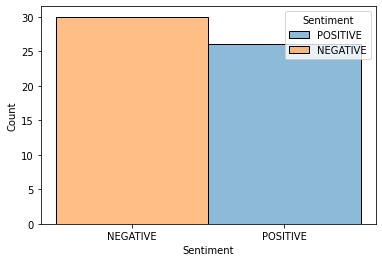

In [13]:
sns.histplot(x = 'Sentiment', data = news_df[news_df['Score'] > 0.8], hue = 'Sentiment', hue_order=['POSITIVE', 'NEGATIVE'])

<AxesSubplot:xlabel='Sentiment2', ylabel='Count'>

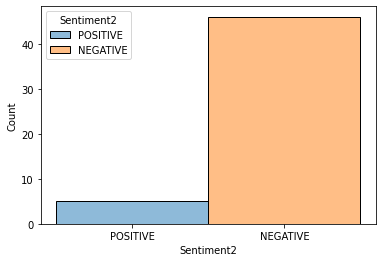

In [14]:
sns.histplot(x = 'Sentiment2', data = news_df[news_df['Score2'] > 0.8], hue = 'Sentiment2', hue_order=['POSITIVE', 'NEGATIVE'])

In [15]:
import sys
sys.path.insert(1, 'C:/Users/Woon/Desktop/Columbia/Applied Analytics/Term3/Sentiment_SNP')

import helper_functions
from helper_functions import *

In [16]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)


## Headline

In [17]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in news_df["headline"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [18]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in news_df["headline"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Content

In [19]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in news_df["content"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [20]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in news_df["content"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [21]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in news_df["content"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# SPY Ticker

In [22]:
from urllib.request import Request, urlopen
from urllib.error import HTTPError
import socket
import urllib

In [23]:
url = "https://finviz.com/quote.ashx?t=SPY&ty=c&ta=1&p=d"


headers = {"User-Agent": "Mozilla/5.0"}
cookies = {"CONSENT": "YES+cb.20210720-07-p0.en+FX+410"}

req = Request(url, headers=headers)

try:
    contents = urlopen(req).read() 
    soup = BeautifulSoup(contents, features="html.parser")

    sentence2 = []

    for tag in soup.find_all('a'):

        sentence = tag.text.split(".")
        sentence2.append(sentence)

except urllib.error.HTTPError as err:
    print(err.code)

except socket.timeout as se:
    print("socket timeout")

In [24]:
df = pd.DataFrame(sentence2)

In [25]:
df['Headline'] = df[0]
df['Sentiment'] = -2
df = pd.DataFrame(list(zip(df['Headline'], df['Sentiment'])), columns=['Headline', 'Sentiment'])

In [26]:
i = []

for string in df['Headline']:
    i.append(count_words(string))

df['word_count'] = i


In [27]:
sentiment = [None] * len(df)
sentiment_score = [None] * len(df)
index = -1
for sentence in df['Headline']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
df['Sentiment'] = sentiment
df['Score'] = sentiment_score


In [28]:
df = df[df['word_count'] > 10]
df['Headline_Lower'] = df['Headline'].str.lower()

In [74]:
df[df['Score'] > 0.8]

,Headline,Sentiment,word_count,Score,Headline_Lower
26,"Jackson Hole Capital Partners, LLC Buys Rent-A-Center Inc, Direxion Daily S&P 500 Bear 3X",NEGATIVE,14,0.974540,"jackson hole capital partners, llc buys rent-a-center inc, direxion daily s&p 500 bear 3x"
27,"Hengehold Capital Management Llc Buys Schwab US Aggregate Bond ETF, iShares National Muni Bond",NEGATIVE,14,0.969672,"hengehold capital management llc buys schwab us aggregate bond etf, ishares national muni bond"
30,"St Denis J Villere & Co LLC Buys Bank of America Corp, Paya Holdings Inc, Open Lending",POSITIVE,17,0.978686,"st denis j villere & co llc buys bank of america corp, paya holdings inc, open lending"
42,Rise of online ordering will continue after COVID-19: Yum China CEO,POSITIVE,11,0.998168,rise of online ordering will continue after covid-19: yum china ceo
49,NASDAQ Makes It Four Days of Gains as Stocks Resume Rally,NEGATIVE,11,0.972605,nasdaq makes it four days of gains as stocks resume rally
51,The stock market is getting dangerously close to the mother of support zones,NEGATIVE,13,0.995923,the stock market is getting dangerously close to the mother of support zones
52,To the investors gobbling up stocks: The intraweek rally attempt faces a better-than-even chance of failure,NEGATIVE,16,0.998739,to the investors gobbling up stocks: the intraweek rally attempt faces a better-than-even chance of failure
53,How low can the stock market go? Watch these two support zones,NEGATIVE,12,0.999458,how low can the stock market go? watch these two support zones
54,"Dos and donts in this stock market: Dont panic, do develop a plan even if you didnt have one before",NEGATIVE,21,0.993685,"dos and donts in this stock market: dont panic, do develop a plan even if you didnt have one before"
55,Stock market investors are asking should I buy or sell? Heres how to decide,NEGATIVE,14,0.998444,stock market investors are asking should i buy or sell? heres how to decide


<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

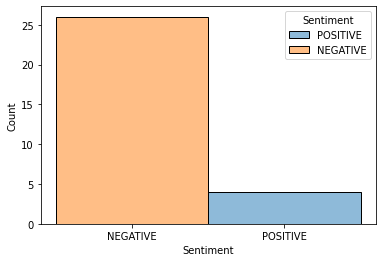

In [29]:
sns.histplot(x = 'Sentiment', data = df[df['Score'] > 0.8], hue = 'Sentiment', hue_order=['POSITIVE', 'NEGATIVE'])

# NUSI Ticker

In [30]:
url = "https://finviz.com/quote.ashx?t=NUSI&ty=c&ta=1&p=d"


headers = {"User-Agent": "Mozilla/5.0"}
cookies = {"CONSENT": "YES+cb.20210720-07-p0.en+FX+410"}

req = Request(url, headers=headers)

try:
    contents = urlopen(req).read() 
    soup = BeautifulSoup(contents, features="html.parser")

    sentence2 = []

    for tag in soup.find_all('a'):

        sentence = tag.text.split(".")
        sentence2.append(sentence)

except urllib.error.HTTPError as err:
    print(err.code)

except socket.timeout as se:
    print("socket timeout")

In [31]:
df = pd.DataFrame(sentence2)

In [32]:
df['Headline'] = df[0]
df['Sentiment'] = -2
df = pd.DataFrame(list(zip(df['Headline'], df['Sentiment'])), columns=['Headline', 'Sentiment'])

In [33]:
i = []

for string in df['Headline']:
    i.append(count_words(string))

df['word_count'] = i


In [34]:
sentiment = [None] * len(df)
sentiment_score = [None] * len(df)
index = -1
for sentence in df['Headline']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
df['Sentiment'] = sentiment
df['Score'] = sentiment_score


In [35]:
df = df[df['word_count'] > 10]
df['Headline_Lower'] = df['Headline'].str.lower()

In [75]:
df[df['Score'] > 0.8]

,Headline,Sentiment,word_count,Score,Headline_Lower
26,"Jackson Hole Capital Partners, LLC Buys Rent-A-Center Inc, Direxion Daily S&P 500 Bear 3X",NEGATIVE,14,0.974540,"jackson hole capital partners, llc buys rent-a-center inc, direxion daily s&p 500 bear 3x"
27,"Hengehold Capital Management Llc Buys Schwab US Aggregate Bond ETF, iShares National Muni Bond",NEGATIVE,14,0.969672,"hengehold capital management llc buys schwab us aggregate bond etf, ishares national muni bond"
30,"St Denis J Villere & Co LLC Buys Bank of America Corp, Paya Holdings Inc, Open Lending",POSITIVE,17,0.978686,"st denis j villere & co llc buys bank of america corp, paya holdings inc, open lending"
42,Rise of online ordering will continue after COVID-19: Yum China CEO,POSITIVE,11,0.998168,rise of online ordering will continue after covid-19: yum china ceo
49,NASDAQ Makes It Four Days of Gains as Stocks Resume Rally,NEGATIVE,11,0.972605,nasdaq makes it four days of gains as stocks resume rally
51,The stock market is getting dangerously close to the mother of support zones,NEGATIVE,13,0.995923,the stock market is getting dangerously close to the mother of support zones
52,To the investors gobbling up stocks: The intraweek rally attempt faces a better-than-even chance of failure,NEGATIVE,16,0.998739,to the investors gobbling up stocks: the intraweek rally attempt faces a better-than-even chance of failure
53,How low can the stock market go? Watch these two support zones,NEGATIVE,12,0.999458,how low can the stock market go? watch these two support zones
54,"Dos and donts in this stock market: Dont panic, do develop a plan even if you didnt have one before",NEGATIVE,21,0.993685,"dos and donts in this stock market: dont panic, do develop a plan even if you didnt have one before"
55,Stock market investors are asking should I buy or sell? Heres how to decide,NEGATIVE,14,0.998444,stock market investors are asking should i buy or sell? heres how to decide


<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

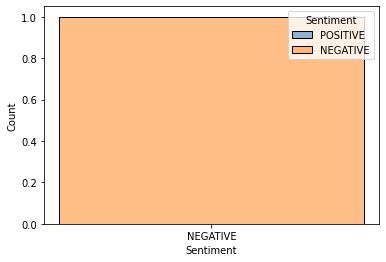

In [36]:
sns.histplot(x = 'Sentiment', data = df[df['Score'] > 0.8], hue = 'Sentiment', hue_order=['POSITIVE', 'NEGATIVE'])

# XOM YF

In [37]:
YAHOO_NEWS_URL = 'https://finance.yahoo.com/quote/XOM/news?p=XOM'
news_df = scrape_yahoo_news(YAHOO_NEWS_URL)

Requesting html page
Extracting news tags
Parsing news tags
Save the data to a CSV


In [38]:
from transformers import pipeline

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

In [39]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [40]:
sentiment = [None] * len(news_df)
sentiment_score = [None] * len(news_df)
index = -1
for sentence in news_df['headline']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
news_df['Sentiment'] = sentiment
news_df['Score'] = sentiment_score


sentiment = [None] * len(news_df)
sentiment_score = [None] * len(news_df)
index = -1
for sentence in news_df['content']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
news_df['Sentiment2'] = sentiment
news_df['Score2'] = sentiment_score

In [41]:
import seaborn as sns

In [76]:
news_df

,source,time,headline,content,Sentiment,Score,Sentiment2,Score2
0,Insider Monkey,2 days ago,12 Best Communication Stocks To Buy Today,"In this article, we discuss the 12 best communication stocks to buy today. If you want to read about some more communication stocks to buy today, go directly to 5 Best Communication Stocks To Buy Today. The communications industry has grown from a sector that used to include just telecommunications, newspapers, magazines, books, and radio […]",POSITIVE,0.999457,POSITIVE,0.994583
1,Simply Wall St.,3 days ago,TELUS Corporation (TSE:T) is largely controlled by institutional shareholders who own 54% of the company,"If you want to know who really controls TELUS Corporation ( TSE:T ), then you'll have to look at the makeup of its...",NEGATIVE,0.892858,NEGATIVE,0.999047
2,Simply Wall St.,22 days ago,TELUS' (TSE:T) Dividend Will Be Increased To CA$0.3511,TELUS Corporation ( TSE:T ) has announced that it will be increasing its dividend from last year's comparable payment...,NEGATIVE,0.988017,NEGATIVE,0.933608
3,Financial Post,24 days ago,"Telus had strategy to 'kill, shape and slow' Rogers-Shaw merger, document shows",Telus’s efforts included company executives meeting with political leaders to try to persuade them to reject the takeover,NEGATIVE,0.997785,NEGATIVE,0.913936
4,Reuters,24 days ago,Rogers says Telus documents show rival tried to 'kill' Shaw deal,"In its effort to win takeover approval, telecom provider Rogers Communications Inc on Monday presented documents to a tribunal that show Canada's second-largest telecom company Telus Corp attempted to sabotage Rogers' C$20 billion ($15 billion) deal to buy Shaw Communications Inc. Challenging Canadian regulators' rejection of the deal on anti-trust grounds, Rogers may seek to argue that Telus wanted to kill the acquisition because it would increase cellphone competition, benefiting Canadian...",NEGATIVE,0.994781,NEGATIVE,0.996364
5,Zacks,24 days ago,DTEGY or TU: Which Is the Better Value Stock Right Now?,DTEGY vs. TU: Which Stock Is the Better Value Option?,NEGATIVE,0.998896,NEGATIVE,0.998626
6,Simply Wall St.,last month,Is TELUS Corporation's (TSE:T) 12% ROE Better Than Average?,"While some investors are already well versed in financial metrics (hat tip), this article is for those who would like...",NEGATIVE,0.999067,POSITIVE,0.996413
7,Zacks,last month,"TELUS (TU) Q3 Earnings & Revenues Top Estimates, Increase Y/Y",TELUS (TU) third-quarter performance boosted by high service revenue in TELUS technology solutions and TELUS International.,NEGATIVE,0.692262,POSITIVE,0.791908
8,Benzinga,last month,Telus Clocks ~10% Revenue Growth In Q3 Backed By Customer Additions; Boosts Dividend By 7.2%,"Telus Corp (NYSE: TU) reported third-quarter FY22 operating revenues and other income growth of 9.9% year-on-year to CA$4.67 billion. Total telecom subscriber connections grew 6.3% Y/Y to 17.7 million. It made 347,000 new customer net additions in the quarter, up 27,000 over last year, including 150,000 mobile phones, 124,000 connected devices, 36,000 internet, 25,000 security, and 18,000 TV customer connections. The mobile phone churn was 0.95%. Adjusted basic EPS was CA$0.34, up 17% Y/Y. A...",NEGATIVE,0.561149,NEGATIVE,0.983207
9,Zacks,last month,Telus (TU) Q3 Earnings and Revenues Beat Estimates,"Telus (TU) delivered earnings and revenue surprises of 4% and 1.93%, respectively, for the quarter ended September 2022. Do the numbers hold clues to what lies ahead for the stock?",NEGATIVE,0.955190,NEGATIVE,0.994703


<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

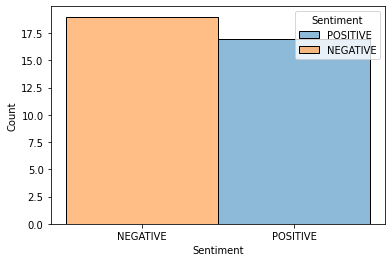

In [42]:
sns.histplot(x = 'Sentiment', data = news_df[news_df['Score'] > 0.8], hue = 'Sentiment', hue_order=['POSITIVE', 'NEGATIVE'])

<AxesSubplot:xlabel='Sentiment2', ylabel='Count'>

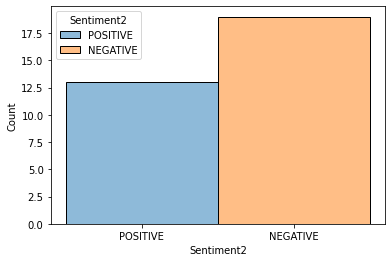

In [43]:
sns.histplot(x = 'Sentiment2', data = news_df[news_df['Score2'] > 0.8], hue = 'Sentiment2', hue_order=['POSITIVE', 'NEGATIVE'])

# XOM Ticker

In [44]:
url = "https://finviz.com/quote.ashx?t=XOM&p=d"


headers = {"User-Agent": "Mozilla/5.0"}
cookies = {"CONSENT": "YES+cb.20210720-07-p0.en+FX+410"}

req = Request(url, headers=headers)

try:
    contents = urlopen(req).read() 
    soup = BeautifulSoup(contents, features="html.parser")

    sentence2 = []

    for tag in soup.find_all('a'):

        sentence = tag.text.split(".")
        sentence2.append(sentence)

except urllib.error.HTTPError as err:
    print(err.code)

except socket.timeout as se:
    print("socket timeout")

In [45]:
df = pd.DataFrame(sentence2)

In [46]:
df['Headline'] = df[0]
df['Sentiment'] = -2
df = pd.DataFrame(list(zip(df['Headline'], df['Sentiment'])), columns=['Headline', 'Sentiment'])

In [47]:
i = []

for string in df['Headline']:
    i.append(count_words(string))

df['word_count'] = i


In [48]:
sentiment = [None] * len(df)
sentiment_score = [None] * len(df)
index = -1
for sentence in df['Headline']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
df['Sentiment'] = sentiment
df['Score'] = sentiment_score


In [49]:
df = df[df['word_count'] > 10]
df['Headline_Lower'] = df['Headline'].str.lower()

In [ ]:
df[df['Score'] > 0.8]

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

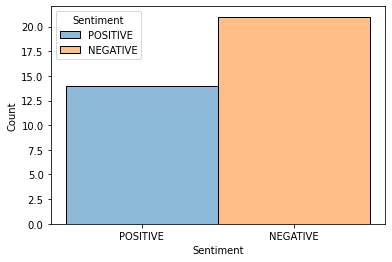

In [50]:
sns.histplot(x = 'Sentiment', data = df[df['Score'] > 0.8], hue = 'Sentiment', hue_order=['POSITIVE', 'NEGATIVE'])

# SQQQ Ticker

In [51]:
url = "https://finviz.com/quote.ashx?t=SQQQ&ty=c&ta=1&p=d"


headers = {"User-Agent": "Mozilla/5.0"}
cookies = {"CONSENT": "YES+cb.20210720-07-p0.en+FX+410"}

req = Request(url, headers=headers)

try:
    contents = urlopen(req).read() 
    soup = BeautifulSoup(contents, features="html.parser")

    sentence2 = []

    for tag in soup.find_all('a'):

        sentence = tag.text.split(".")
        sentence2.append(sentence)

except urllib.error.HTTPError as err:
    print(err.code)

except socket.timeout as se:
    print("socket timeout")

In [52]:
df = pd.DataFrame(sentence2)

In [53]:
df['Headline'] = df[0]
df['Sentiment'] = -2
df = pd.DataFrame(list(zip(df['Headline'], df['Sentiment'])), columns=['Headline', 'Sentiment'])

In [54]:
i = []

for string in df['Headline']:
    i.append(count_words(string))

df['word_count'] = i


In [55]:
sentiment = [None] * len(df)
sentiment_score = [None] * len(df)
index = -1
for sentence in df['Headline']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
df['Sentiment'] = sentiment
df['Score'] = sentiment_score


In [56]:
df = df[df['word_count'] > 10]
df['Headline_Lower'] = df['Headline'].str.lower()

In [ ]:
df[df['Score'] > 0.8]

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

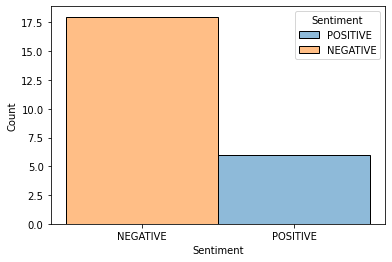

In [57]:
sns.histplot(x = 'Sentiment', data = df[df['Score'] > 0.8], hue = 'Sentiment', hue_order=['POSITIVE', 'NEGATIVE'])

# T.TO

In [58]:
YAHOO_NEWS_URL = 'https://finance.yahoo.com/quote/T.TO/news?p=T.TO'
news_df = scrape_yahoo_news(YAHOO_NEWS_URL)

Requesting html page
Extracting news tags
Parsing news tags
Save the data to a CSV


In [59]:
from transformers import pipeline

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

In [60]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [61]:
sentiment = [None] * len(news_df)
sentiment_score = [None] * len(news_df)
index = -1
for sentence in news_df['headline']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
news_df['Sentiment'] = sentiment
news_df['Score'] = sentiment_score


sentiment = [None] * len(news_df)
sentiment_score = [None] * len(news_df)
index = -1
for sentence in news_df['content']:
    index+=1
    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
news_df['Sentiment2'] = sentiment
news_df['Score2'] = sentiment_score

In [62]:
import seaborn as sns

In [ ]:
news_df

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

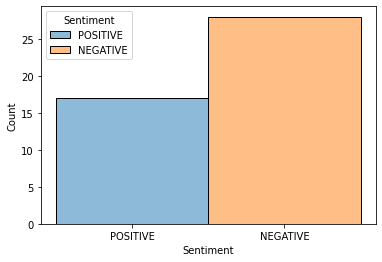

In [63]:
sns.histplot(x = 'Sentiment', data = news_df[news_df['Score'] > 0.8], hue = 'Sentiment', hue_order=['POSITIVE', 'NEGATIVE'])

<AxesSubplot:xlabel='Sentiment2', ylabel='Count'>

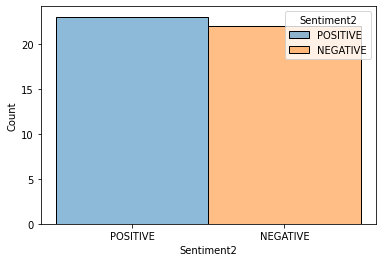

In [64]:
sns.histplot(x = 'Sentiment2', data = news_df[news_df['Score2'] > 0.8], hue = 'Sentiment2', hue_order=['POSITIVE', 'NEGATIVE'])